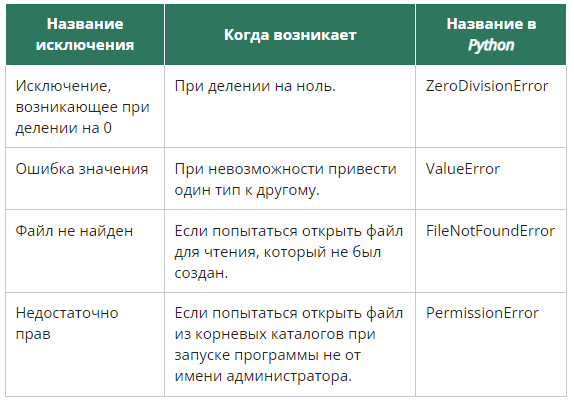

In [1]:
print("Перед исключением")
c = 1 / 0  # Здесь что-то не так….
print("После исключения")

Перед исключением


ZeroDivisionError: division by zero

In [2]:
print("Перед исключением")
# теперь пользователь сам вводит числа для деления
a = int(input("a: "))
b = int(input("b: "))
c = a / b  # здесь может возникнуть исключение деления на ноль
print(c)  # печатаем c = a / b, если всё хорошо
print("После исключения")

Перед исключением
1.0
После исключения


онкости обработки исключений. Собственные классы исключений

BaseException
 +-- SystemExit
 +-- KeyboardInterrupt
 +-- GeneratorExit
 +-- Exception
  	+-- StopIteration
  	+-- StopAsyncIteration
  	+-- ArithmeticError
  	|	FloatingPointError
  	|	OverflowError
  	|	ZeroDivisionError
  	+-- AssertionError
  	+-- AttributeError
  	+-- BufferError
  	+-- EOFError
  	+-- ImportError
  	|	+-- ModuleNotFoundError
  	+-- LookupError
  	|	+-- IndexError
  	|	+-- KeyError
  	+-- MemoryError
  	+-- NameError
  	|	+-- UnboundLocalError
  	+-- OSError
  	|	+-- BlockingIOError
  	|	+-- ChildProcessError
  	|	+-- ConnectionError
  	|	|	+-- BrokenPipeError
  	|	|	+-- ConnectionAbortedError
  	|	|	+-- ConnectionRefusedError
  	|	|	+-- ConnectionResetError
  	|	+-- FileExistsError
  	|	+-- FileNotFoundError
  	|	+-- InterruptedError
  	|	+-- IsADirectoryError
  	|	+-- NotADirectoryError
  	|	+-- PermissionError
  	|	+-- ProcessLookupError
  	|	+-- TimeoutError
  	+-- ReferenceError
  	+-- RuntimeError
  	|	+-- NotImplementedError
  	|	+-- RecursionError
  	+-- SyntaxError
  	|	+-- IndentationError
  	|     	+-- TabError
  	+-- SystemError
  	+-- TypeError
  	+-- ValueError
  	|	+-- UnicodeError
  	|     	+-- UnicodeDecodeError
  	|     	+-- UnicodeEncodeError
  	|     	+-- UnicodeTranslateError
  	+-- Warning
       	+-- DeprecationWarning
       	+-- PendingDeprecationWarning
       	+-- RuntimeWarning
       	+-- SyntaxWarning
       	+-- UserWarning
       	+-- FutureWarning
       	+-- ImportWarning
       	+-- UnicodeWarning
       	+-- BytesWarning
       	+-- ResourceWarning

In [3]:
try:
    raise ZeroDivisionError  # возбуждаем исключение ZeroDivisionError
except ArithmeticError:  # ловим его родителя
    print("Hello from arithmetic error")

Hello from arithmetic error


Вот правильный пример для наглядности:

In [4]:
try:
    raise ZeroDivisionError
except ZeroDivisionError:  # сначала пытаемся поймать потомка
    print("Zero division error")
except ArithmeticError:  # потом ловим родителя
    print("Arithmetic error")

Zero division error


In [5]:
# Иногда может понадобиться написать собственное исключение.
class MyException(Exception):  # создаём пустой класс исключения 
    pass

 
try:
    raise MyException("message")  # поднимаем наше исключение
except MyException as e:  # ловим его
    print(e)  # выводим информацию об исключении

message


In [6]:
class ParentException(Exception):  # создаём пустой класс исключения, наследуемся от exception
    pass

 
class ChildException(ParentException):  # создаём пустой класс исключения-потомка, наследуемся от ParentException
    pass

 
try:
    raise ChildException("message")  # поднимаем исключение-потомок
except ParentException as e:  # ловим его родителя
    print(e)  # выводим информацию об исключении

message


1. Исключения — это такие особенные классы, которые, как и любые классы, можно наследовать. Если вы хотите ловить несколько исключений, то сначала ловите потомков, а потом родителей, чтобы ничего не упустить.
2. Чтобы создать собственный класс, нужно просто написать пустой класс и наследовать его от класса Exception, этого будет достаточно.
3. Необязательно «отлавливать» сам класс. При необходимости можно отлавливать его родителя, это тоже будет работать, но вы можете упустить важную информацию.

Создайте класс Square. Добавьте в конструктор класса Square собственное исключение NonPositiveDigitException, унаследованное от ValueError, которое будет срабатывать каждый раз, когда сторона квадрата меньше или равна 0.

In [7]:
class NonPositiveDigitException(ValueError):
    pass
 
class Square:
    def __init__(self, a):
        if a <= 0:
            raise NonPositiveDigitException('Неправильно указана сторона квадрата')